In [1]:
pip install --upgrade numpy scipy pandas scikit-learn


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 1.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 2.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 3.1 MB/s eta 0:00:00a 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
    tinycss2 (>=1.1.0<1.2) ; extra == 'css'
             ~~~~~~~~^
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linux

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
df = pd.read_csv("Mall_customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
df.shape

(200, 5)

In [7]:
df = df.iloc[:, [3,4]].values

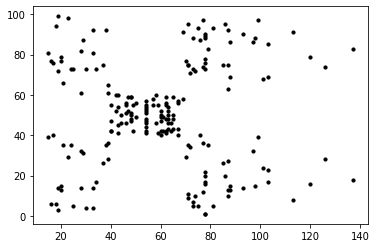

In [8]:
plt.scatter(df[:,0], df[:,1], s=10, c= "black")

In [9]:
from sklearn.cluster import KMeans

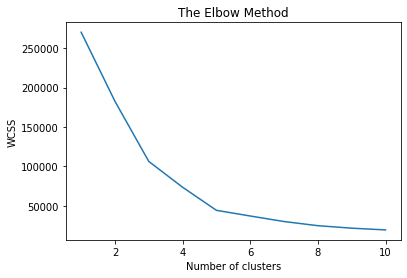

In [10]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i,
    init = 'k-means++', max_iter= 300, n_init= 10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [11]:
from sklearn.cluster import DBSCAN

In [12]:
dbscan = DBSCAN(eps=5, min_samples=5)

In [13]:
labels = dbscan.fit_predict(df)

In [14]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4])

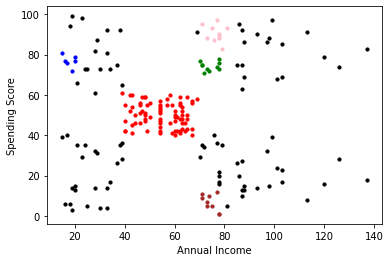

In [15]:
# Visualising the clusters
plt.scatter(df[labels == -1, 0], df[labels == -1, 1], s = 10, c = 'black') 

plt.scatter(df[labels == 0, 0], df[labels == 0, 1], s = 10, c = 'blue')
plt.scatter(df[labels == 1, 0], df[labels == 1, 1], s = 10, c = 'red')
plt.scatter(df[labels == 2, 0], df[labels == 2, 1], s = 10, c = 'green')
plt.scatter(df[labels == 3, 0], df[labels == 3, 1], s = 10, c = 'brown')
plt.scatter(df[labels == 4, 0], df[labels == 4, 1], s = 10, c = 'pink')
plt.scatter(df[labels == 5, 0], df[labels == 5, 1], s = 10, c = 'yellow')      
plt.scatter(df[labels == 6, 0], df[labels == 6, 1], s = 10, c = 'silver')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()